## Longevity Bayes Net


First we create a Pomegranate Bayesian Network using the protobuf interface and our utility package, bayes, that enables one to conveniently create a Bayesian network by hand without having to fill in every probability.  The same Baysian network can start with our hand entered guesses, but can later learn from data.  Any amount of questions can be answered, including no questions, to get the probabilities of having covid , the severity of illness, and the chances of going to the hospital.  The file the Bayesian net is written in is covid_bayes.py.  Our utility package can then be used to query the network with different patient states.  This is convenient for tuning hand entered parameters .



In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install -e ../bayesnet
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install datetime




Obtaining file:///home/opencog/bayesnet
  Attempting uninstall: covid-bayes
    Found existing installation: covid-bayes 1.0
    Can't uninstall 'covid-bayes'. No files were found to uninstall.
  Running setup.py develop for covid-bayes


In [2]:
!{sys.executable} -m pip install -r requirements.txt
!sh buildproto.sh

### Longevity net
Here put the name of the network you have written with the protobuf and bayes utilities.  Our example is printed out.  We created 4 functions in our utility package: any_of, all_of, if_the_else, and avg, which can together be used to express almost any set of rules, documented elsewhere.  We also implemented a dependency rule with which one can enter statistics from Systematic Reviews and Meta analyses easily.  The last lines implement the creation of the description of the network,  bayesianNetwork , with the protobuf utilities, and then the creation of the Pomegranate network with the description.  

In [3]:
#text_file = open('./sn_bayes/longevity_bayes.py')
text_file = open('./sn_bayes/longevity_bayes_short.py')
file_content = text_file.read()
print(file_content)
text_file.close()

import sn_bayes
from sn_bayes.utils import any_of
from sn_bayes.utils import all_of
from sn_bayes.utils import avg
from sn_bayes.utils import if_then_else
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import addCpt
from sn_bayes.utils import relative_risk
from sn_bayes.utils import non_cpt_descriptions

import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetwork


def longevity_bayes_short():
        bayesianNetwork = BayesianNetwork()



        outstr = '' 
        
        cpt={}
        
        discreteDistribution = bayesianNetwork.discreteDistributions.add()
        discreteDistribution.name = "gender"
        variable = discreteDistribution.variables.add()
        variable.name = "male"
        variable.probability = 0.49
        variable = discreteDistribution.variables.add()
        variable.name = "female"
        variable.probability = 0.51
        
        
        discreteDistribution = bayesianNetwork.disc

 Next run the file and print the rules in it in human readable format.  All routines are stateless.

In [4]:
import sn_bayes
#from sn_bayes import longevity_bayes
#bayesianNetwork, outstr = longevity_bayes.longevity_bayes()
from sn_bayes import longevity_bayes_short
bayesianNetwork, outstr = longevity_bayes_short.longevity_bayes_short()
print (outstr)


The prevalence of  gender of value male is 0.49000000953674316, and of value female is 0.5099999904632568.

The prevalence of  age of value elderly is 0.05000000074505806, of value adult is 0.25, of value young_adult is 0.30000001192092896, of value teen is 0.20000000298023224, and of value child is 0.20000000298023224.

The prevalence of  bmi of value bmi_over_40_high_risk is 0.07999999821186066, of value bmi_35_to_39_moderate_risk is 0.10000000149011612, of value bmi_30_to_34_low_risk is 0.20000000298023224, of value bmi_25_to_29_overweight is 0.30000001192092896, and of value bmi_under_25_healthy is 0.3199999928474426.

The prevalence of  how_many_times_saw_doctor_last_year of value saw_doctor_none_last_year is 0.1599999964237213, of value saw_doctor_1_or_2_times_last_year is 0.5, of value saw_doctor_3_or_4_times_last_year is 0.20999999344348907, and of value saw_doctor_over_4_times_last_year is 0.20000000298023224.

The prevalence of  how_long_since_saw_doctor of value never_saw_a

For convenience of creating a table, here are all the variables in the net in order.  They should be mapped into the individual buckets of the rules.  The variables up to "systemically_disadvantaged" are the ones that the user may answer.  The rest are computed.

In [5]:
import sn_bayes
from sn_bayes.utils import complexity_check
complexity_check(bayesianNetwork)

(True, '')

In [6]:
import sn_bayes
from sn_bayes.utils import get_var_positions
var_positions = get_var_positions(bayesianNetwork)
var_positions

{'gender': 0,
 'age': 1,
 'bmi': 2,
 'how_many_times_saw_doctor_last_year': 3,
 'how_long_since_saw_doctor': 4,
 'daily_asprin_prescription': 5,
 'daily_aspirin_compliance': 6,
 'shortness_of_breath_exertion': 7,
 'walking_difficulty': 8,
 'two_hour_standing_difficulty': 9,
 'stand_from_sit_difficulty': 10,
 'ten_stairs_difficulty': 11,
 'chore_difficulty': 12,
 'two_hour_sitting_difficulty': 13,
 'social_activity_difficulty': 14,
 'greatest_weight': 15,
 'weight_at_25': 16,
 'hearing_difficulty_how_often': 17,
 'hearing_frustration_how_often': 18,
 'wear_hearing_aid': 19,
 'loud_noise_job': 20,
 'loud_music': 21,
 'high_blood_pressure_patient_prescription': 22,
 'high_blood_pressure_medication_compliance': 23,
 'work_limiting_problem': 24,
 'urine_leakage_bother': 25,
 'chest_pain': 26,
 'blood_relative_heart_attack_before_age_50': 27,
 'liver_condition': 28,
 'osteoporosis': 29,
 'asthma_attack_last_year': 30,
 'artificial_joints': 31,
 'birth_weight': 32,
 'teeth_health': 33,
 'last

Here are the positions of every bucketed response for each of the above variables:

In [7]:
import sn_bayes
from sn_bayes.utils import get_var_val_positions
var_val_positions = get_var_val_positions(bayesianNetwork)
var_val_positions

{'gender': {'male': 0, 'female': 1},
 'age': {'elderly': 0, 'adult': 1, 'young_adult': 2, 'teen': 3, 'child': 4},
 'bmi': {'bmi_over_40_high_risk': 0,
  'bmi_35_to_39_moderate_risk': 1,
  'bmi_30_to_34_low_risk': 2,
  'bmi_25_to_29_overweight': 3,
  'bmi_under_25_healthy': 4},
 'how_many_times_saw_doctor_last_year': {'saw_doctor_none_last_year': 0,
  'saw_doctor_1_or_2_times_last_year': 1,
  'saw_doctor_3_or_4_times_last_year': 2,
  'saw_doctor_over_4_times_last_year': 3},
 'how_long_since_saw_doctor': {'never_saw_a_doctor': 0,
  'saw_doctor_more_than_5_years_ago': 1,
  'saw_doctor_2_to_5_years_ago': 2,
  'saw_doctor_1_to_2_years_ago': 3,
  'saw_doctor_6_to_12_months_ago': 4,
  'saw_doctor_less_than_6_months_ago': 5},
 'daily_asprin_prescription': {'daily_asprin_prescription_yes': 0,
  'daily_asprin_prescription_no': 1},
 'daily_aspirin_compliance': {'daily_aspirin_compliance_no': 0,
  'daily_aspirin_compliance_yes': 1},
 'shortness_of_breath_exertion': {'shortness_of_breath_exertion_y

We create a spreadsheet of the above for reference

In [8]:
import pandas as pd

rows_list = []
outname = "varvals.csv"
for var, valdict in var_val_positions.items():
    rowdict = {} 
    rows_list.append(rowdict)
    varstr= var +"("
    for val, pos in valdict.items():
        varstr += val
        varstr+= ","
            
    varstr=varstr[:-1]+")"
    rowdict["variable"] = varstr        

df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

Here we create a spreadsheet that makes a Cartesian product of desired outputs with the remainder of the variables. This can be used to, for example, fill in a treatment recommendation for variables that are returned as causing the output in the explanation module 

In [9]:
import pandas as pd
#cols = ["leaves","internal","output"]
desired_output =["hallmark_1_genomic_instability","hallmark_2_telomere_attrition","hallmark_3_epigenetic_alterations","hallmark_4_loss_of_proteostasis","hallmark_5_deregulated_nutrient_sensing","hallmark_6_mitochondrial_dysfunction","hallmark_7_cellular_senescence","hallmark_8_stem_cell_exhaustion","hallmark_9_altered_intercellular_communication","hallmark_10_extracellular_matrix_dysfunction"]
       
rows_list = []
outname = "upshot.csv"

#put leaves in the first column, then internal vars along with the vars that feed them in the second.  
#and do a cartesian product with the outvars that are also internal vars (should be all of them)

for output in desired_output:
    for dist in bayesianNetwork.discreteDistributions:
        print(dist.name)
        rowdict = {} 
        rowdict["leaves"]= dist.name
        rowdict["internal"]=""
        rowdict["output"]= output
        rows_list.append(rowdict)
    for table in bayesianNetwork.conditionalProbabilityTables:
        print ("table: {}".format(table.name))
        rowdict = {}
        rowdict["leaves"]=""
        internal_str = table.name + " ("
        for var in table.randomVariables:
            print(var.name)
            internal_str += var.name
            internal_str+= ","         
        internal_str=internal_str[:-1]+")"
        rowdict["internal"] = internal_str
        rowdict["output"]= output
        rows_list.append(rowdict)

for dist in bayesianNetwork.discreteDistributions:
    print(dist.name)
    rowdict = {} 
    rowdict["leaves"]= dist.name
    rowdict["internal"]=""
    rowdict["output"]= ""
    rows_list.append(rowdict)
for table in bayesianNetwork.conditionalProbabilityTables:
    print ("table: {}".format(table.name))
    rowdict = {}
    rowdict["leaves"]=""
    internal_str = table.name + " ("
    for var in table.randomVariables:
        print(var.name)
        internal_str += var.name
        internal_str+= ","         
    internal_str=internal_str[:-1]+")"
    rowdict["internal"] = internal_str
    rowdict["output"]= ""
    rows_list.append(rowdict)
    
df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

gender
age
bmi
how_many_times_saw_doctor_last_year
how_long_since_saw_doctor
daily_asprin_prescription
daily_aspirin_compliance
shortness_of_breath_exertion
walking_difficulty
two_hour_standing_difficulty
stand_from_sit_difficulty
ten_stairs_difficulty
chore_difficulty
two_hour_sitting_difficulty
social_activity_difficulty
greatest_weight
weight_at_25
hearing_difficulty_how_often
hearing_frustration_how_often
wear_hearing_aid
loud_noise_job
loud_music
high_blood_pressure_patient_prescription
high_blood_pressure_medication_compliance
work_limiting_problem
urine_leakage_bother
chest_pain
blood_relative_heart_attack_before_age_50
liver_condition
osteoporosis
asthma_attack_last_year
artificial_joints
birth_weight
teeth_health
last_dentist_visit
times_brush_teeth_daily
floss_days_per_week
dental_bone_loss
gum_disease
mouth_pain_last_year
cancer
table: obesity
bmi
greatest_weight
weight_at_25
table: hypertension
high_blood_pressure_patient_prescription
high_blood_pressure_medication_complian

In [10]:
df

,internal,leaves,output
0,,gender,hallmark_1_genomic_instability
1,,age,hallmark_1_genomic_instability
2,,bmi,hallmark_1_genomic_instability
3,,how_many_times_saw_doctor_last_year,hallmark_1_genomic_instability
4,,how_long_since_saw_doctor,hallmark_1_genomic_instability
5,,daily_asprin_prescription,hallmark_1_genomic_instability
6,,daily_aspirin_compliance,hallmark_1_genomic_instability
7,,shortness_of_breath_exertion,hallmark_1_genomic_instability
8,,walking_difficulty,hallmark_1_genomic_instability
9,,two_hour_standing_difficulty,hallmark_1_genomic_instability


Here is a one more csv that uses a utility function to express the net in  a tree form, in a data frame and then prints it out 

In [11]:
import sn_bayes
from sn_bayes.utils import make_tree
import pandas as pd
df = make_tree(bayesianNetwork)
outname = "tree.csv"
df.to_csv(outname, index = False)

In [12]:
df

,level0,level1,level2,level3,level4
0,gender),"obesity(bmi,greatest_weight,weight_at_25)","inflammation(cancer,asthma_attack_last_year,po...","frailty(general_aging_signs,hearing_difficulty...","hallmark_1_genomic_instability(frailty,cancer)"
1,age),hypertension(high_blood_pressure_patient_presc...,"sarcopenia(sarcopenia_movement,sarcopenia_func...",hallmark_6_mitochondrial_dysfunction(inflammat...,"hallmark_2_telomere_attrition(frailty,gender)"
2,bmi),"poor_oral_health(teeth_health,gum_disease,flos...",hallmark_4_loss_of_proteostasis(cardiovascular...,"hallmark_7_cellular_senescence(cancer,inflamma...",hallmark_5_deregulated_nutrient_sensing(frailty)
3,how_many_times_saw_doctor_last_year),cardiovascular_dysfunction(daily_asprin_prescr...,None,hallmark_9_altered_intercellular_communication...,"hallmark_8_stem_cell_exhaustion(frailty,inflam..."
4,how_long_since_saw_doctor),"general_aging_signs(urine_leakage_bother,osteo...",None,hallmark_10_extracellular_matrix_dysfunction(c...,None
5,daily_asprin_prescription),hearing_difficulty(hearing_difficulty_how_ofte...,None,None,None
6,daily_aspirin_compliance),"sarcopenia_movement(walking_difficulty,two_hou...",None,None,None
7,shortness_of_breath_exertion),"sarcopenia_function(chore_difficulty,social_ac...",None,None,None
8,walking_difficulty),hallmark_3_epigenetic_alterations(liver_condit...,None,None,None
9,two_hour_standing_difficulty),None,None,None,None


In [13]:
import networkx as nx
import re

G = nx.DiGraph()
regex = re.compile(r'^([a-z_]*)\(.*')


for index, row in df.iterrows():
    for col in df.columns:
        if row[col] is not None:
            node = row[col][:-1] if col == "level0" else row[col]
            G.add_node(node)
            
for node1 in G.nodes:
    for node2 in G.nodes:
        match = regex.match(node1)
        if (node1+',' in node2) or (match is not None and match.group(1)+"," in node2): 
            G.add_edge(node1,node2)
            if match is not None and match.group(1)+"," in node2:
                print (node1)
                print(node2)
        

inflammation(cancer,asthma_attack_last_year,poor_oral_health,hypertension,obesity)
hallmark_7_cellular_senescence(cancer,inflammation,cardiovascular_dysfunction)
inflammation(cancer,asthma_attack_last_year,poor_oral_health,hypertension,obesity)
hallmark_10_extracellular_matrix_dysfunction(cancer,inflammation,cardiovascular_dysfunction)
frailty(general_aging_signs,hearing_difficulty,sarcopenia)
hallmark_1_genomic_instability(frailty,cancer)
frailty(general_aging_signs,hearing_difficulty,sarcopenia)
hallmark_2_telomere_attrition(frailty,gender)
frailty(general_aging_signs,hearing_difficulty,sarcopenia)
hallmark_8_stem_cell_exhaustion(frailty,inflammation)
hypertension(high_blood_pressure_patient_prescription,high_blood_pressure_medication_compliance)
inflammation(cancer,asthma_attack_last_year,poor_oral_health,hypertension,obesity)
poor_oral_health(teeth_health,gum_disease,floss_days_per_week,times_brush_teeth_daily,mouth_pain_last_year)
inflammation(cancer,asthma_attack_last_year,poor_o

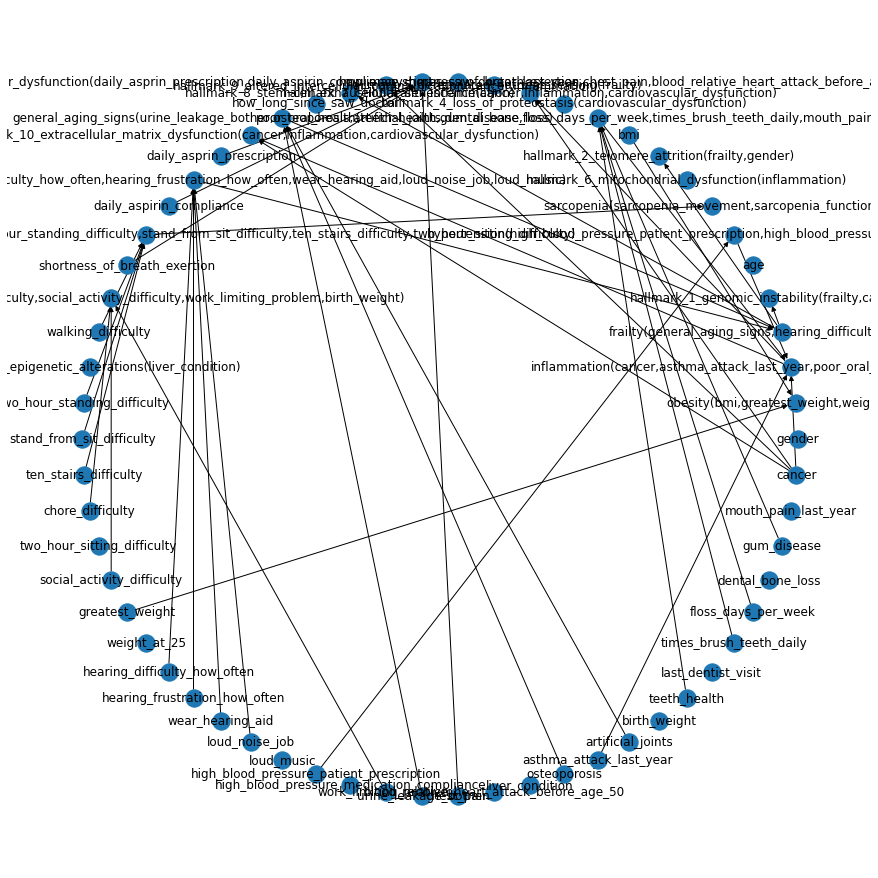

In [14]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(12,12)) 
#nx.draw(G, with_labels=True)  
#nx.draw_random(G, with_labels=True)   
nx.draw_circular(G, with_labels=True)  
#nx.draw_spectral(G, with_labels=True)   
#nx.draw_spring(G, with_labels=True)  

Here is the description of the Bayesian network in protobuf that we just created with the running of the python file.  Only the "leaves" have initial probabilities (DiscreteDistribution), the conditional probabilities (ConditionalProbabilityTable) are to be computed:

In [15]:
bayesianNetwork

discreteDistributions {
  name: "gender"
  variables {
    name: "male"
    probability: 0.49000000953674316
  }
  variables {
    name: "female"
    probability: 0.5099999904632568
  }
}
discreteDistributions {
  name: "age"
  variables {
    name: "elderly"
    probability: 0.05000000074505806
  }
  variables {
    name: "adult"
    probability: 0.25
  }
  variables {
    name: "young_adult"
    probability: 0.30000001192092896
  }
  variables {
    name: "teen"
    probability: 0.20000000298023224
  }
  variables {
    name: "child"
    probability: 0.20000000298023224
  }
}
discreteDistributions {
  name: "bmi"
  variables {
    name: "bmi_over_40_high_risk"
    probability: 0.07999999821186066
  }
  variables {
    name: "bmi_35_to_39_moderate_risk"
    probability: 0.10000000149011612
  }
  variables {
    name: "bmi_30_to_34_low_risk"
    probability: 0.20000000298023224
  }
  variables {
    name: "bmi_25_to_29_overweight"
    probability: 0.30000001192092896
  }
  variables {


Here is the Pomegranate net we just made with the description.  Here we compile the net so we can compute probabilities with it.

In [16]:
from sn_bayes.utils import bayesInitialize
covid = bayesInitialize(bayesianNetwork)

In [17]:
covid.bake()

We we call a Pomegranate routine that shows the computed probabilities of every variable.  We have made our own utility that pulls out particular variables.

In [18]:
covid.predict_proba({}) 

array([{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "male" : 0.4900000095367433,
            "female" : 0.5099999904632568
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "elderly" : 0.04999999981373565,
            "adult" : 0.24999999534338715,
            "young_adult" : 0.3000000063329933,
            "teen" : 0.19999999925494197,
            "child" : 0.19999999925494197
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "bmi_over_40_high_risk" : 0.07999999829503529,
            "bmi_35_to_39_moderate_risk" : 0.1000000015940843,
            "bmi_30_to_34_low_risk" : 0.20000000120699318,
            "bmi_25_to_29_overweight" : 0.30000000

## Testing the Bayesian Network

Here we use our query util to enter patient states as evidence (evidence), and then see the probabilities of particular variables we are interested in (outvars), in this case, the output variables.    The query function needs the compiled Pomegranate Bayesian network as well as the description of the network.  In the following examples, we enter a particular patients state , one question at a time, to get a continual change in probability of all states. Below, we first look at the probability of emergency treatment, covid risk, and covid severity, in general.  We start by looking at the prior distribution, before any evidence is entered.   Then, we look at it given the information that the patient is elderly. We see that the chance of severity has increased. Adding more risk factors increases risk more, and adding more severity factors increases severity more.

In [19]:
import sn_bayes
from sn_bayes.utils import query
outvars = desired_output
evidence = {}
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'hallmark_1_genomic_instability': {'hallmark_1_genomic_instability': 0.22483393248013497,
  'no_hallmark_1_genomic_instability': 0.7751660675198652},
 'hallmark_2_telomere_attrition': {'hallmark_2_telomere_attrition': 0.4423339367402828,
  'no_hallmark_2_telomere_attrition': 0.5576660632597173},
 'hallmark_3_epigenetic_alterations': {'no_hallmark_3_epigenetic_alterations': 0.9499999986961479,
  'hallmark_3_epigenetic_alterations': 0.05000000130385202},
 'hallmark_4_loss_of_proteostasis': {'no_hallmark_4_loss_of_proteostasis': 0.7679999931336124,
  'hallmark_4_loss_of_proteostasis': 0.2320000068663876},
 'hallmark_5_deregulated_nutrient_sensing': {'hallmark_5_deregulated_nutrient_sensing': 0.39466786394382225,
  'no_hallmark_5_deregulated_nutrient_sensing': 0.6053321360561776},
 'hallmark_6_mitochondrial_dysfunction': {'hallmark_6_mitochondrial_dysfunction': 0.38175760231155553,
  'no_hallmark_6_mitochondrial_dysfunction': 0.6182423976884445},
 'hallmark_7_cellular_senescence': {'hallm

In [20]:
evidence["liver_condition"]= "liver_condition_yes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'hallmark_1_genomic_instability': {'hallmark_1_genomic_instability': 0.22483393248013497,
  'no_hallmark_1_genomic_instability': 0.7751660675198652},
 'hallmark_2_telomere_attrition': {'hallmark_2_telomere_attrition': 0.4423339367402828,
  'no_hallmark_2_telomere_attrition': 0.5576660632597173},
 'hallmark_3_epigenetic_alterations': {'no_hallmark_3_epigenetic_alterations': 0.0,
  'hallmark_3_epigenetic_alterations': 1.0},
 'hallmark_4_loss_of_proteostasis': {'no_hallmark_4_loss_of_proteostasis': 0.7679999931336124,
  'hallmark_4_loss_of_proteostasis': 0.2320000068663876},
 'hallmark_5_deregulated_nutrient_sensing': {'hallmark_5_deregulated_nutrient_sensing': 0.39466786394382225,
  'no_hallmark_5_deregulated_nutrient_sensing': 0.6053321360561776},
 'hallmark_6_mitochondrial_dysfunction': {'hallmark_6_mitochondrial_dysfunction': 0.38175760231155553,
  'no_hallmark_6_mitochondrial_dysfunction': 0.6182423976884445},
 'hallmark_7_cellular_senescence': {'hallmark_7_cellular_senescence': 0.5

In [21]:
evidence["cancer"] = "cancer"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'hallmark_1_genomic_instability': {'hallmark_1_genomic_instability': 0.6973339319719111,
  'no_hallmark_1_genomic_instability': 0.30266606802808893},
 'hallmark_2_telomere_attrition': {'hallmark_2_telomere_attrition': 0.44233393674028293,
  'no_hallmark_2_telomere_attrition': 0.5576660632597172},
 'hallmark_3_epigenetic_alterations': {'no_hallmark_3_epigenetic_alterations': 0.0,
  'hallmark_3_epigenetic_alterations': 1.0},
 'hallmark_4_loss_of_proteostasis': {'no_hallmark_4_loss_of_proteostasis': 0.7679999991552187,
  'hallmark_4_loss_of_proteostasis': 0.23200000084478137},
 'hallmark_5_deregulated_nutrient_sensing': {'hallmark_5_deregulated_nutrient_sensing': 0.3946678639438225,
  'no_hallmark_5_deregulated_nutrient_sensing': 0.6053321360561775},
 'hallmark_6_mitochondrial_dysfunction': {'hallmark_6_mitochondrial_dysfunction': 0.5707575948536696,
  'no_hallmark_6_mitochondrial_dysfunction': 0.4292424051463304},
 'hallmark_7_cellular_senescence': {'hallmark_7_cellular_senescence': 1.0

In [22]:
evidence["chest_pain"] = "chest_pain_yes"
evidence["shortness_of_breath_exertion"] = "shortness_of_breath_exertion_yes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'hallmark_1_genomic_instability': {'hallmark_1_genomic_instability': 0.6973339319719111,
  'no_hallmark_1_genomic_instability': 0.30266606802808893},
 'hallmark_2_telomere_attrition': {'hallmark_2_telomere_attrition': 0.4423339367402828,
  'no_hallmark_2_telomere_attrition': 0.5576660632597171},
 'hallmark_3_epigenetic_alterations': {'no_hallmark_3_epigenetic_alterations': 0.0,
  'hallmark_3_epigenetic_alterations': 1.0},
 'hallmark_4_loss_of_proteostasis': {'no_hallmark_4_loss_of_proteostasis': 0.5040000041115242,
  'hallmark_4_loss_of_proteostasis': 0.4959999958884758},
 'hallmark_5_deregulated_nutrient_sensing': {'hallmark_5_deregulated_nutrient_sensing': 0.3946678639438223,
  'no_hallmark_5_deregulated_nutrient_sensing': 0.6053321360561776},
 'hallmark_6_mitochondrial_dysfunction': {'hallmark_6_mitochondrial_dysfunction': 0.5707575929261075,
  'no_hallmark_6_mitochondrial_dysfunction': 0.4292424070738924},
 'hallmark_7_cellular_senescence': {'hallmark_7_cellular_senescence': 1.0,


In [23]:
evidence["asthma_attack_last_year"] = "asthma_attack_last_year_yes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'hallmark_1_genomic_instability': {'hallmark_1_genomic_instability': 0.697333931971911,
  'no_hallmark_1_genomic_instability': 0.302666068028089},
 'hallmark_2_telomere_attrition': {'hallmark_2_telomere_attrition': 0.4423339367402828,
  'no_hallmark_2_telomere_attrition': 0.5576660632597172},
 'hallmark_3_epigenetic_alterations': {'no_hallmark_3_epigenetic_alterations': 0.0,
  'hallmark_3_epigenetic_alterations': 1.0},
 'hallmark_4_loss_of_proteostasis': {'no_hallmark_4_loss_of_proteostasis': 0.5040000049844655,
  'hallmark_4_loss_of_proteostasis': 0.49599999501553443},
 'hallmark_5_deregulated_nutrient_sensing': {'hallmark_5_deregulated_nutrient_sensing': 0.39466786394382225,
  'no_hallmark_5_deregulated_nutrient_sensing': 0.6053321360561776},
 'hallmark_6_mitochondrial_dysfunction': {'hallmark_6_mitochondrial_dysfunction': 0.6879293098505885,
  'no_hallmark_6_mitochondrial_dysfunction': 0.31207069014941136},
 'hallmark_7_cellular_senescence': {'hallmark_7_cellular_senescence': 1.0,


## Testing Explanations

The explain function will tell you which nodes, whether inner or leaf, when changed, change the output variable.  A variable is on the reverse explain list if we want to know what changes to other variables will increase it.  Otherwise we look to 
changes that decrease the variable to be explained.  One may select which explanations are relevant for their purposes, as this is just a measure of dependence. The point is to find out which variables help a situation, where the output variables are the goals.  At default values, for example the covid_risk variable, we want to find out how to decrease an output_variables probability, when we move a variable from where it is to one value to the right.  Our present rules, in covid_bayes.py, are designed so that one value to the right is an improvement.  The explanation output tells you the change in the probability of the output variable when this happens.  Those explanations with the greatest values tell the variables that when you improve them decrease the probability of the output variable the most, and are thus the most helpful in decreasing the chance of a bad thing.  However, the social_distancing variables need to additionally be on the reverse_explain_list because they are not bad things, they are good things, so as a goal, you would want to know how to increase their probability not decrease it.  So, to find an explanation for why an indicator is so good, you have to enter all the nodes of the net into reverse_evidence that were not in reverse_evidence when explainng why an indicator is doing poorly.

Although we need the explain function for complex rule sets in which the direction of the rules  changes at times because there are different and multiple goals, we have made two wrapper functions that only apply for rulesets in which all the rules are in the same direction, for example the covid ruleset and the longevity ruleset.  One wrapper is explain_why_bad, which takes on the default of the explain function, and has no reverse_explain_list or reverse_evidence.  The other is explain_why_good, explained below.  explain_why_good (and explain using reverse evidence and explain vars only works when the result is actually good, and explain_why_bad (and the explain default) only works when a result is actually bad.

In [24]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars)
explain_results

In [25]:
#The above is the equivalent of the following for nets all of one direction:
from sn_bayes.utils import explain_why_bad
explain_why_bad(covid,bayesianNetwork,evidence,outvars)

{'hallmark_1_genomic_instability': {'liver_condition': 0.0,
  'cancer': 0.4999999999999996,
  'chest_pain': -1.1102230246251565e-16,
  'shortness_of_breath_exertion': -1.1102230246251565e-16,
  'asthma_attack_last_year': -1.1102230246251565e-16,
  'hypertension': -1.1102230246251565e-16,
  'poor_oral_health': -1.1102230246251565e-16,
  'inflammation': -1.1102230246251565e-16,
  'general_aging_signs': 0.11061952832691335,
  'hallmark_3_epigenetic_alterations': 0.0,
  'hallmark_6_mitochondrial_dysfunction': -1.1102230246251565e-16,
  'hallmark_7_cellular_senescence': 0.25000000031266095,
  'hallmark_8_stem_cell_exhaustion': 0.13020732784417233,
  'hallmark_9_altered_intercellular_communication': -1.1102230246251565e-16,
  'hallmark_10_extracellular_matrix_dysfunction': -1.1102230246251565e-16},
 'hallmark_2_telomere_attrition': {'liver_condition': 0.0,
  'cancer': 0.0,
  'chest_pain': 0.0,
  'shortness_of_breath_exertion': 0.0,
  'asthma_attack_last_year': 1.1102230246251565e-16,
  'hype

Here is an example of the use of reverse_evidence and reverse_explain_list.  Recall, above we were looking at variables that could help a situation, where the output variables are the goals.  At default values, for example the covid_risk variable, we want to find out how to decrease an output_variables probability, when we move a variable from where it is to one value to the right.  Our present rules, in covid_bayes.py, are designed so that one value to the right is an improvement.  The explanation output tells you the change in the probability of the output variable when this happens.  At default settings, those explanations with the greatest values tell the variables that when you improve them decrease the probability of the output variable the most, and are thus the most helpful in decreasing the chance of a bad thing.  And, when that goal is a good thing, we want to know how to increase its probability, and thus we would like to know what are the best variables to change that do so, so we put goals like social_distancing on the reverse_explain_list.  However, we can also ue reverse_evidence and reverse_explain list to tell why a goal is doing well, as opposed to finding what would improve it.  In this case you would want to know what variable it is, when it worsens, worsens the output. The covid_risk variable gets worse when it is more probable, so to find out why it is doing so well, that is to find out what has sustained it, we see what makes covid_risk more  probable, when that sustaining thing is taken away.  Because we want to see what happens when it gets worse, the variables are put on the reverse_evidence_list.  In the following example we see values we are monitoring were not worse, for example, that social distancing was that most people are in a medium risk environment.  Since covid_risk and covid_severity are at bad levels, then the explain_why_good routine does not work on them.

In [26]:
from sn_bayes.utils import explain_why_good
explain_why_good(covid,bayesianNetwork,evidence,outvars)

{'hallmark_1_genomic_instability': {'obesity': 0.0,
  'cardiovascular_dysfunction': -1.1102230246251565e-16,
  'hearing_difficulty': -0.13526402387005187,
  'sarcopenia_movement': -0.11135490401162307,
  'sarcopenia_function': -0.11135490401162307,
  'sarcopenia': -0.11135490401162307,
  'frailty': -0.30266606802808904,
  'hallmark_2_telomere_attrition': -0.13502532886941698,
  'hallmark_4_loss_of_proteostasis': -1.1102230246251565e-16,
  'hallmark_5_deregulated_nutrient_sensing': -0.30266606802808904},
 'hallmark_2_telomere_attrition': {'obesity': 0.0,
  'cardiovascular_dysfunction': 1.1102230246251565e-16,
  'hearing_difficulty': 0.13526402387005176,
  'sarcopenia_movement': 0.11135490401162301,
  'sarcopenia_function': 0.11135490401162301,
  'sarcopenia': 0.11135490401162301,
  'frailty': 0.3026660680280887,
  'hallmark_4_loss_of_proteostasis': 1.1102230246251565e-16,
  'hallmark_5_deregulated_nutrient_sensing': 0.3026660680280887},
 'hallmark_3_epigenetic_alterations': {'obesity': 

In [27]:
reverse_evidence = ["gender","age","bmi","how_many_times_saw_doctor_last_year","how_long_since_saw_doctor","daily_asprin_prescription","daily_aspirin_compliance","shortness_of_breath_exertion","walking_difficulty","two_hour_standing_difficulty","stand_from_sit_difficulty","ten_stairs_difficulty","chore_difficulty","two_hour_sitting_difficulty","social_activity_difficulty","greatest_weight","weight_at_25","hearing_difficulty_how_often","hearing_frustration_how_often","wear_hearing_aid","loud_noise_job","loud_music","high_blood_pressure_patient_prescription","high_blood_pressure_medication_compliance","work_limiting_problem","urine_leakage_bother","chest_pain","blood_relative_heart_attack_before_age_50","liver_condition","osteoporosis","asthma_attack_last_year","artificial_joints","birth_weight","teeth_health","last_dentist_visit","times_brush_teeth_daily","floss_days_per_week","dental_bone_loss","gum_disease","mouth_pain_last_year","cancer","obesity","hypertension","poor_oral_health","inflammation","cardiovascular_dysfunction","general_aging_signs","hearing_difficulty","sarcopenia_movement","sarcopenia_function","sarcopenia","frailty","hallmark_1_genomic_instability","hallmark_2_telomere_attrition","hallmark_3_epigenetic_alterations","hallmark_4_loss_of_proteostasis","hallmark_5_deregulated_nutrient_sensing","hallmark_6_mitochondrial_dysfunction","hallmark_7_cellular_senescence","hallmark_8_stem_cell_exhaustion","hallmark_9_altered_intercellular_communication","hallmark_10_extracellular_matrix_dysfunction"]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_evidence=reverse_evidence)
explain_results

{'hallmark_1_genomic_instability': {'obesity': 0.0,
  'cardiovascular_dysfunction': -1.1102230246251565e-16,
  'hearing_difficulty': -0.13526402387005187,
  'sarcopenia_movement': -0.11135490401162307,
  'sarcopenia_function': -0.11135490401162307,
  'sarcopenia': -0.11135490401162307,
  'frailty': -0.30266606802808904,
  'hallmark_2_telomere_attrition': -0.13502532886941698,
  'hallmark_4_loss_of_proteostasis': -1.1102230246251565e-16,
  'hallmark_5_deregulated_nutrient_sensing': -0.30266606802808904},
 'hallmark_2_telomere_attrition': {'obesity': 0.0,
  'cardiovascular_dysfunction': 1.1102230246251565e-16,
  'hearing_difficulty': 0.13526402387005176,
  'sarcopenia_movement': 0.11135490401162301,
  'sarcopenia_function': 0.11135490401162301,
  'sarcopenia': 0.11135490401162301,
  'frailty': 0.3026660680280887,
  'hallmark_4_loss_of_proteostasis': 1.1102230246251565e-16,
  'hallmark_5_deregulated_nutrient_sensing': 0.3026660680280887},
 'hallmark_3_epigenetic_alterations': {'obesity': 